## Model Testing Section
---

## Data import

In [48]:
# Import data.csv
import pandas as pd
df = pd.read_csv('../data/processed/cleaned.csv')

# Checking
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Library import

In [49]:
import pandas as pd
import numpy as np
import os

## Column type split

In [50]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

## Manual Encode and Format

In [51]:
# Categorical columns format
mapping = {
    'yes': 1,
    'no': 0,
    'positive': 1,
    'negative': 0,
    'male' : 0,
    'female' : 1
}

for col in cat_cols:
    # Lower string and strip spaces
    df[col] = df[col].astype(str).str.lower().str.strip()

    # แปลงค่าตาม mapping
    df[col] = df[col].replace(mapping)

C:\Users\majis\AppData\Local\Temp\ipykernel_23000\2214027414.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)
C:\Users\majis\AppData\Local\Temp\ipykernel_23000\2214027414.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)
C:\Users\majis\AppData\Local\Temp\ipykernel_23000\2214027414.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

## Scale numerical data for Logistic regression

In [52]:
from sklearn.preprocessing import StandardScaler

# clone df
scaled_df = df.copy()

# scale numeric columns
scaler = StandardScaler()
scaled_df[num_cols] = scaler.fit_transform(df[num_cols])

print("✔ Numeric features scaled into scaled_df")

✔ Numeric features scaled into scaled_df


In [53]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [54]:
drop_col_target = ['muscle stiffness','Obesity','delayed healing','Itching']

# Drop columns from both dataframes
df = df.drop(columns=drop_col_target)
scaled_df = scaled_df.drop(columns=drop_col_target)

## Check dropped dataframes

In [55]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,Alopecia,class
0,40,0,0,1,0,1,0,0,0,0,0,1,1
1,58,0,0,0,0,1,0,0,1,0,1,1,1
2,41,0,1,0,0,1,1,0,0,0,0,1,1
3,45,0,0,0,1,1,1,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1


In [56]:
scaled_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,Alopecia,class
0,-0.710101,0,0,1,0,1,0,0,0,0,0,1,1
1,0.759074,0,0,0,0,1,0,0,1,0,1,1,1
2,-0.628480,0,1,0,0,1,1,0,0,0,0,1,1
3,-0.301997,0,0,0,1,1,1,1,0,0,0,0,1
4,0.922315,0,1,1,1,1,1,0,1,1,1,1,1


In [57]:
in_use_cols = df.columns
in_use_cols

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Irritability', 'partial paresis', 'Alopecia', 'class'],
      dtype='object')

---

# Model 1 : Logistic Regression

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# สมมติว่า df คือ DataFrame ของคุณ
# แยก features กับ label
X = scaled_df.drop('class', axis=1)
y = scaled_df['class']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (200, 12)
Shape X_test: (50, 12)


In [59]:
import pandas as pd
import numpy as np

# Model
from sklearn.linear_model import LogisticRegression

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Hyperparameters
logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

# Fit the model : Adjust weights to the data
logreg.fit(X_train, y_train)

# Predict
y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:, 1]

=== Logistic Regression Performance ===
Accuracy : 0.8600
Precision: 1.0000
Recall   : 0.7941
F1-score : 0.8852
ROC AUC  : 0.9430


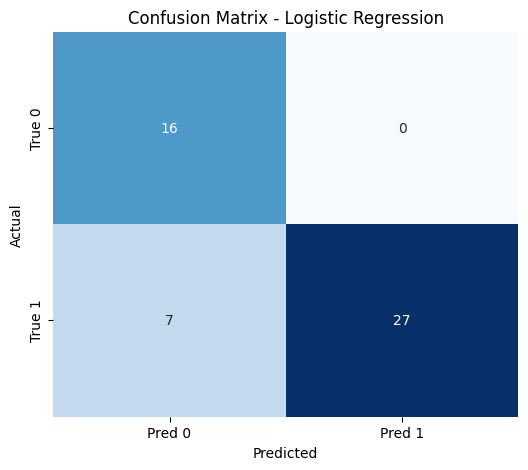

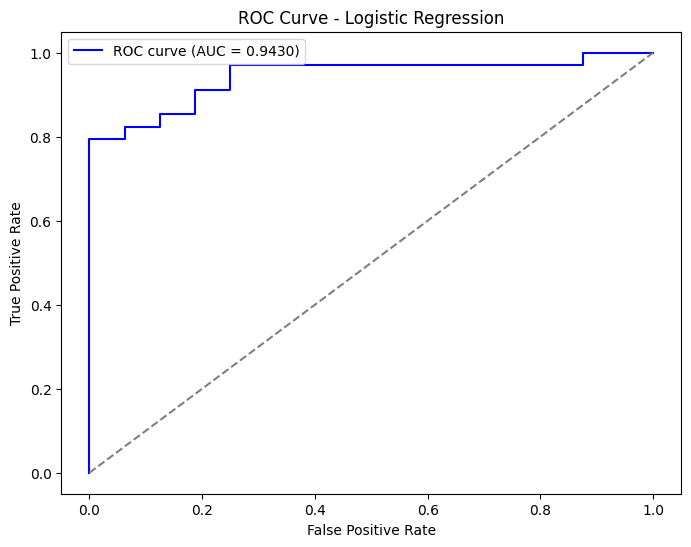

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# ---- Scores ----
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_proba_lr)

# For Graph
lr_accuracy = accuracy
lr_f1 = f1
lr_roc_auc = roc_auc

print("=== Logistic Regression Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

# To DataFrame
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-score": [f1],
    "ROC AUC": [roc_auc]
})

# Export as CSV
metrics_df.to_csv("../results/output/logreg_performance.csv", index=False)


# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred_lr)

# ---- Plot Confusion Matrix ----
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

# Figures output
plt.savefig(os.path.join("../results/figures", "LR_CMatrix"), dpi=300)

plt.show()


# ---- Plot ROC Curve ----
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # เส้น diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()

# Figures output
plt.savefig(os.path.join("../results/figures", "LR_ROCCurve"), dpi=300)

plt.show()

## Export model

In [61]:
import joblib

# Save the model
joblib.dump(logreg, "../models/logreg_model.pkl")

print("Model saved to ../models/logreg_model.pkl")

Model saved to ../models/logreg_model.pkl


In [62]:
# Load the model back for testing
logreg_loaded = joblib.load("../models/logreg_model.pkl")
print(type(logreg_loaded))
print(logreg_loaded.get_params())

<class 'sklearn.linear_model._logistic.LogisticRegression'>
{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': -1, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


---
# Model 2 : Decision Tree

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# เตรียมข้อมูล (ใช้ df ไม่สเกล)
# -----------------------------
X = df.drop('class', axis=1)
y = df['class']

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Decision Tree
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

=== Decision Tree Performance ===
Accuracy : 0.9200
Precision: 0.9375
Recall   : 0.9375
F1-score : 0.9375
ROC AUC  : 0.9132


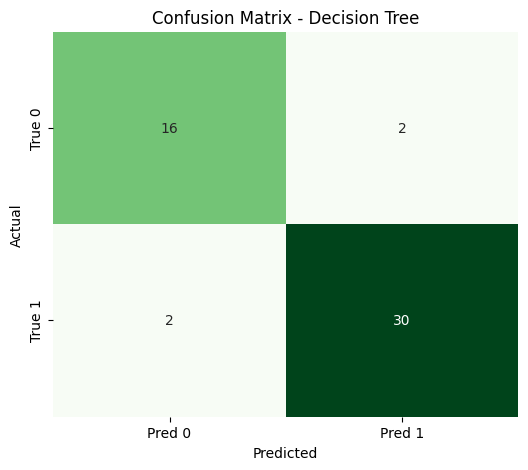

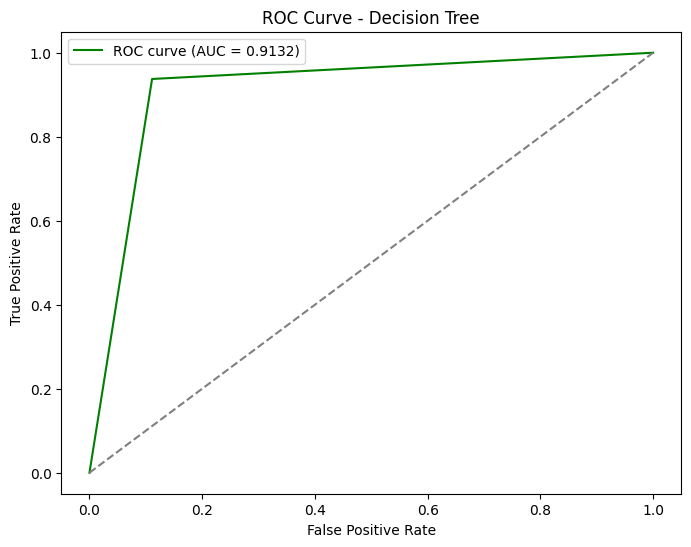

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Predict probability
# -----------------------------
y_proba_dt = dt.predict_proba(X_test)[:, 1]  # probability ของ class 1

# -----------------------------
# Calculate scores
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_proba_dt)

# For Graph
dt_accuracy = accuracy
dt_f1 = f1
dt_roc_auc = roc_auc


print("=== Decision Tree Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

# To DataFrame
metrics_df = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-score": [f1],
    "ROC AUC": [roc_auc]
})

# Export as CSV
metrics_df.to_csv("../results/output/decisiontree_performance.csv", index=False)

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

# Figures output
plt.savefig(os.path.join("../results/figures", "DTree_CMatrix"), dpi=300)

plt.show()

# -----------------------------
# ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # เส้น diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()

# Figures output
plt.savefig(os.path.join("../results/figures", "DTree_ROCCurve"), dpi=300)

plt.show()


## Export Model

In [65]:
import joblib

# Save the model
joblib.dump(dt, "../models/dtree_model.pkl")

print("Model saved to ../models/dtree_model.pkl")

Model saved to ../models/dtree_model.pkl


In [66]:
# Load the model back for testing
dtree_loaded = joblib.load("../models/dtree_model.pkl")
print(type(dtree_loaded))
print(dtree_loaded.get_params())

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


---
# Model 3 : Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# เตรียมข้อมูล (df ไม่สเกล)
# -----------------------------
X = df.drop('class', axis=1)
y = df['class']

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

=== Random Forest Performance ===
Accuracy : 0.9000
Precision: 0.9091
Recall   : 0.9375
F1-score : 0.9231
ROC AUC  : 0.9852


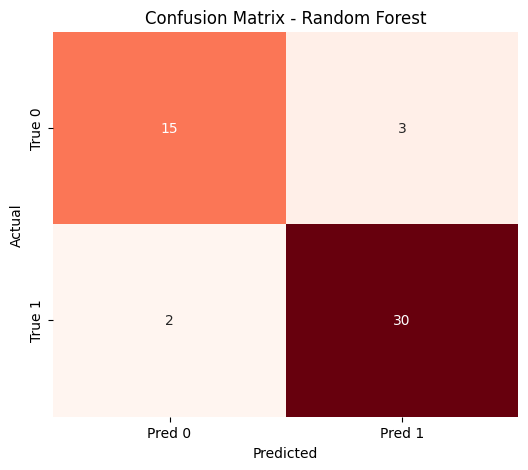

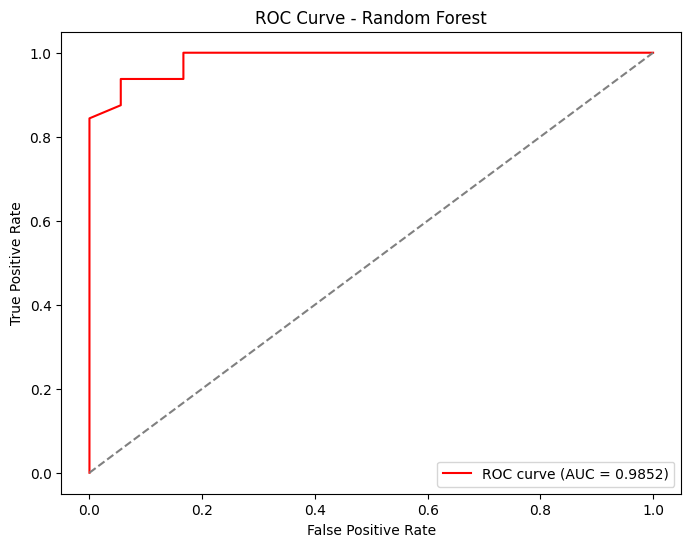

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Predict probability
# -----------------------------
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # probability ของ class 1

# -----------------------------
# Calculate scores
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

print("=== Random Forest Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")


# For Graph
rf_accuracy = accuracy
rf_f1 = f1
rf_roc_auc = roc_auc

# To DataFrame
metrics_df = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-score": [f1],
    "ROC AUC": [roc_auc]
})

# Export as CSV
metrics_df.to_csv("../results/output/randomforest_performance.csv", index=False)

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# Figures output
plt.savefig(os.path.join("../results/figures", "RF_CMatrix"), dpi=300)

plt.show()

# -----------------------------
# ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # เส้น diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()

# Figures output
plt.savefig(os.path.join("../results/figures", "RF_ROCCurve"), dpi=300)

plt.show()

## Export Model

In [69]:
import joblib

# Save the model
joblib.dump(rf, "../models/randomforest_model.pkl")

print("Model saved to ../models/randomforest_model.pkl")

Model saved to ../models/randomforest_model.pkl


In [70]:
# Load the model back for testing
rf_loaded = joblib.load("../models/randomforest_model.pkl")
print(type(rf_loaded))
print(rf_loaded.get_params())

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [71]:
print(rf_loaded.n_features_in_)

12


## Comparison

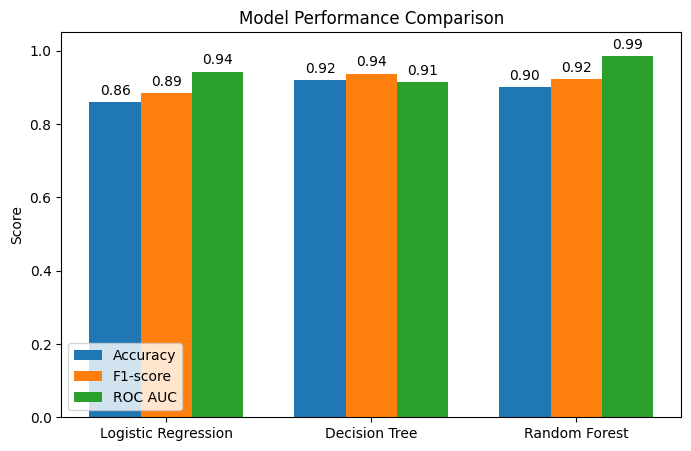

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# lr_accuracy, lr_f1, lr_roc_auc
# dt_accuracy, dt_f1, dt_roc_auc
# rf_accuracy, rf_f1, rf_roc_auc

# metric
accuracy = [lr_accuracy, dt_accuracy, rf_accuracy]
f1 = [lr_f1, dt_f1, rf_f1]
roc_auc = [lr_roc_auc, dt_roc_auc, rf_roc_auc]

# number of model
x = np.arange(3)

# graph width
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))

# place bar graph
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='#1f77b4')
rects2 = ax.bar(x, f1, width, label='F1-score', color='#ff7f0e')
rects3 = ax.bar(x + width, roc_auc, width, label='ROC AUC', color='#2ca02c')

# label x as model name
ax.set_xticks(x)
ax.set_xticklabels(['Logistic Regression', 'Decision Tree', 'Random Forest'])
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

# add number to graph
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.05)  # adjust y-axis for clean look


# Figures output
plt.savefig(os.path.join("../results/figures", "Model_Comparison"), dpi=300)

plt.show()


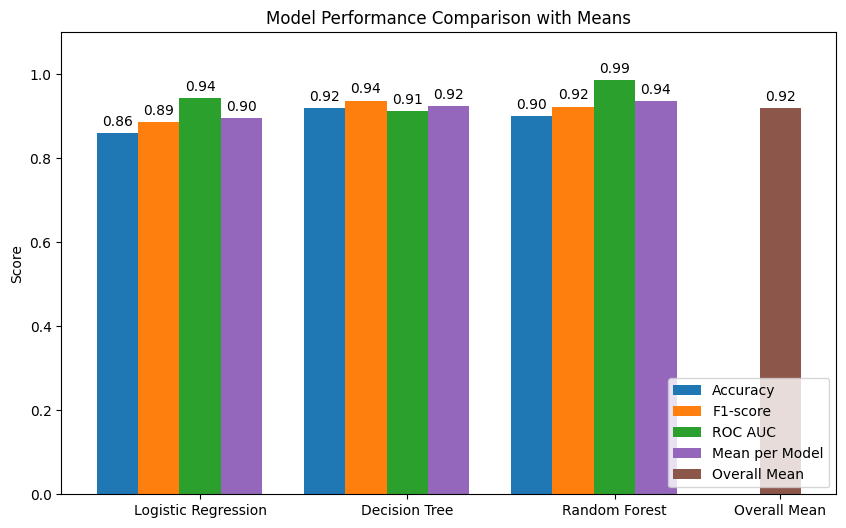

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import os

# lr_accuracy, lr_f1, lr_roc_auc
# dt_accuracy, dt_f1, dt_roc_auc
# rf_accuracy, rf_f1, rf_roc_auc

# metric
accuracy = [lr_accuracy, dt_accuracy, rf_accuracy]
f1 = [lr_f1, dt_f1, rf_f1]
roc_auc = [lr_roc_auc, dt_roc_auc, rf_roc_auc]

# number of model
x = np.arange(3)

# graph width
width = 0.2  # ลด width เล็กน้อยให้ใส่แท่งเฉลี่ยเพิ่มได้

fig, ax = plt.subplots(figsize=(10,6))

# place bar graph
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='#1f77b4')
rects2 = ax.bar(x, f1, width, label='F1-score', color='#ff7f0e')
rects3 = ax.bar(x + width, roc_auc, width, label='ROC AUC', color='#2ca02c')

# calculate mean
mean_per_model = [(accuracy[i]+f1[i]+roc_auc[i])/3 for i in range(3)]
overall_mean = np.mean(accuracy + f1 + roc_auc)

# add mean bars
rects4 = ax.bar(x + 2*width, mean_per_model, width, label='Mean per Model', color='#9467bd')
rects5 = ax.bar([3], [overall_mean], width, label='Overall Mean', color='#8c564b')

# label x as model name + overall
ax.set_xticks(list(x + width) + [3])
ax.set_xticklabels(['Logistic Regression', 'Decision Tree', 'Random Forest', 'Overall Mean'])
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison with Means')
ax.legend()

# add numbers on top
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

for r in [rects1, rects2, rects3, rects4, rects5]:
    autolabel(r)

plt.ylim(0, 1.1)

# Save figure
os.makedirs("../results/figures", exist_ok=True)
plt.savefig(os.path.join("../results/figures", "Model_Comparison_with_Mean.png"), dpi=300)

plt.show()


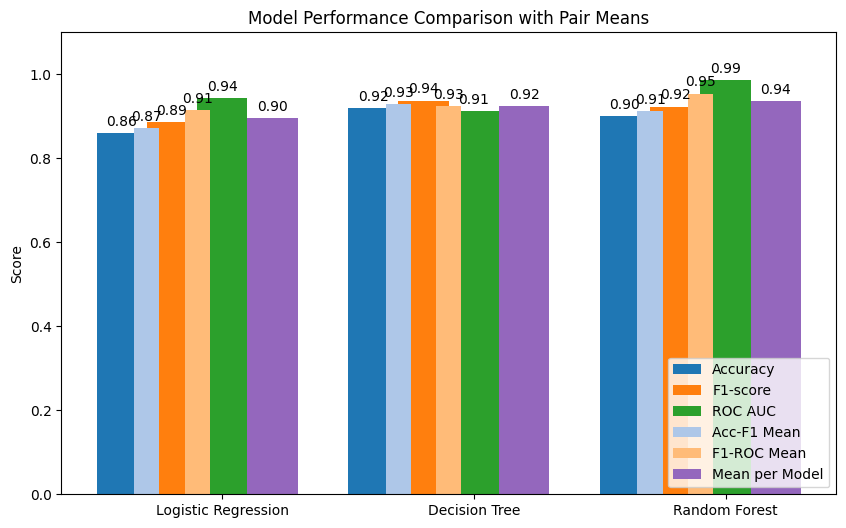

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import os

# lr_accuracy, lr_f1, lr_roc_auc
# dt_accuracy, dt_f1, dt_roc_auc
# rf_accuracy, rf_f1, rf_roc_auc

# metric
accuracy = [lr_accuracy, dt_accuracy, rf_accuracy]
f1 = [lr_f1, dt_f1, rf_f1]
roc_auc = [lr_roc_auc, dt_roc_auc, rf_roc_auc]

x = np.arange(3)
width = 0.2  # ความกว้างแท่งหลัก

fig, ax = plt.subplots(figsize=(10,6))

# แท่งหลัก
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='#1f77b4')
rects2 = ax.bar(x, f1, width, label='F1-score', color='#ff7f0e')
rects3 = ax.bar(x + width, roc_auc, width, label='ROC AUC', color='#2ca02c')

# แท่งเฉลี่ยคู่ (เล็กกว่า)
pair_width = width/2
acc_f1 = [(accuracy[i]+f1[i])/2 for i in range(3)]
f1_roc = [(f1[i]+roc_auc[i])/2 for i in range(3)]

rects4 = ax.bar(x - width/2, acc_f1, pair_width, label='Acc-F1 Mean', color='#aec7e8')
rects5 = ax.bar(x + width/2, f1_roc, pair_width, label='F1-ROC Mean', color='#ffbb78')

# แท่งเฉลี่ยต่อ Model
mean_per_model = [(accuracy[i]+f1[i]+roc_auc[i])/3 for i in range(3)]
rects6 = ax.bar(x + 2*width, mean_per_model, width, label='Mean per Model', color='#9467bd')

# label x
ax.set_xticks(list(x + width))
ax.set_xticklabels(['Logistic Regression', 'Decision Tree', 'Random Forest'])
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison with Pair Means')
ax.legend()

# ฟังก์ชันใส่ตัวเลขบนแท่ง
def autolabel(rects, fmt='{:.2f}'):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(fmt.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

for r in [rects1, rects2, rects3, rects4, rects5, rects6]:
    autolabel(r)

plt.ylim(0, 1.1)

# Save figure
os.makedirs("../results/figures", exist_ok=True)
plt.savefig(os.path.join("../results/figures", "Model_Comparison_with_PairMeans.png"), dpi=300)

plt.show()


## Feature Importance

In [ ]:
import pandas as pd
import joblib

# Load model
logreg_model = joblib.load("../models/logreg_model.pkl")

# All column
input_cols = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
              'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
              'Irritability', 'partial paresis', 'Alopecia']

# Coefficient
coefs = logreg_model.coef_[0]

# DataFrame
importance_df = pd.DataFrame({
    'Feature': input_cols,
    'Coefficient': coefs,
    'Absolute': abs(coefs)
}).sort_values(by='Absolute', ascending=False)

print("Feature importance (จาก Logistic Regression):")
print(importance_df[['Feature','Coefficient']])

Feature importance (จาก Logistic Regression):
               Feature  Coefficient
3           Polydipsia     2.248998
2             Polyuria     1.967193
1               Gender     1.551942
7       Genital thrush     1.200793
9         Irritability     1.147578
4   sudden weight loss     1.018679
6           Polyphagia     0.789576
11            Alopecia    -0.713986
10     partial paresis     0.530539
8      visual blurring     0.395015
5             weakness    -0.269603
0                  Age    -0.200656


In [ ]:
import pandas as pd
import joblib

# Load Decision Tree model
dt_model = joblib.load("../models/dtree_model.pkl")

# All Column
input_cols = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
              'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
              'Irritability', 'partial paresis', 'Alopecia']

# Feature importance
importance_df = pd.DataFrame({
    'Feature': input_cols,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature importance (Decision Tree):")
print(importance_df)


Feature importance (Decision Tree):
               Feature  Importance
2             Polyuria    0.386047
3           Polydipsia    0.135461
0                  Age    0.128515
1               Gender    0.068740
11            Alopecia    0.061735
4   sudden weight loss    0.050926
7       Genital thrush    0.046008
5             weakness    0.041686
9         Irritability    0.038505
6           Polyphagia    0.022156
10     partial paresis    0.017671
8      visual blurring    0.002551


In [ ]:
import pandas as pd
import joblib

# Load Random Forest model
rf_model = joblib.load("../models/randomforest_model.pkl")

# Column
input_cols = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
              'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
              'Irritability', 'partial paresis', 'Alopecia']

# Feature importance
importance_df = pd.DataFrame({
    'Feature': input_cols,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature importance (Random Forest):")
print(importance_df)


Feature importance (Random Forest):
               Feature  Importance
2             Polyuria    0.221990
3           Polydipsia    0.178381
0                  Age    0.161865
1               Gender    0.067668
9         Irritability    0.059096
6           Polyphagia    0.056324
11            Alopecia    0.047386
10     partial paresis    0.043612
8      visual blurring    0.041337
4   sudden weight loss    0.041284
5             weakness    0.040783
7       Genital thrush    0.040273
